In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('Full Transactions.csv')
data.head(100)

,station_dsp_id,station_num_id,station_name,station_state,coordinate_x,coordinate_y,nb_chargepoints,charge_id,start_charge,stopped_charge,...,subscription_id,customer_id,offer_name,connector_type,billing_state,charge_amount,StartDateTime,StopDatetime,PiT_min,CostPerMin_in_pence
0,BR1-1NX-01,1,Bromley/Elmfield Park Road,open,0.018438,51.400333,1,bc2872517,6/6/2018,6/6/2018,...,NaN,NaN,bluecity,NaN,NaN,NaN,6/6/2018 13:56:23,6/6/2018 13:57:48,1.416667,0
1,BR1-1NX-01,1,Bromley/Elmfield Park Road,open,0.018438,51.400333,1,bc2872592,6/6/2018,6/6/2018,...,NaN,NaN,bluecity,NaN,NaN,NaN,6/6/2018 14:02:12,6/6/2018 14:03:53,1.683333,0
2,BR1-1NX-01,1,Bromley/Elmfield Park Road,open,0.018438,51.400333,1,bc2872684,6/6/2018,6/6/2018,...,NaN,NaN,bluecity,NaN,NaN,NaN,6/6/2018 14:09:59,6/6/2018 14:15:09,5.166667,0
3,BR1-1NX-01,1,Bromley/Elmfield Park Road,open,0.018438,51.400333,1,bc2872769,6/6/2018,6/6/2018,...,NaN,NaN,bluecity,NaN,NaN,NaN,6/6/2018 14:16:41,6/6/2018 14:17:37,0.933333,0
4,BR1-1NX-01,1,Bromley/Elmfield Park Road,open,0.018438,51.400333,1,bc2872783,6/6/2018,6/8/2018,...,NaN,NaN,bluecity,NaN,NaN,NaN,6/6/2018 14:17:48,6/8/2018 8:35:52,2538.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BR1-3UH-01,2,Bromley/Civic Centre Car Park,open,0.020377,51.403879,2,124451,10/16/2017,10/16/2017,...,41087.0,262585.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,4.35,10/16/2017 14:49:45,10/16/2017 16:49:48,120.050000,3.623490213
96,BR1-3UH-01,2,Bromley/Civic Centre Car Park,open,0.020377,51.403879,2,125159,10/20/2017,10/20/2017,...,41827.0,189192.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,2.55,10/20/2017 9:02:22,10/20/2017 10:13:21,70.983333,3.592392581
97,BR1-3UH-01,2,Bromley/Civic Centre Car Park,open,0.020377,51.403879,2,125824,10/24/2017,10/24/2017,...,46430.0,444168.0,sourcelondon-flexi-apr-2017,Type 2 - 7 kW,BILLED,5.78,10/24/2017 11:21:08,10/24/2017 12:58:22,97.233333,5.94446349
98,BR1-3UH-01,2,Bromley/Civic Centre Car Park,open,0.020377,51.403879,2,126131,10/26/2017,10/26/2017,...,47176.0,457960.0,sourcelondon-flexi-apr-2017,Type 1 - 3 kW,BILLED,6.31,10/26/2017 9:24:00,10/26/2017 11:10:26,106.433333,5.928593799


In [ ]:
print(data.customer_id.unique().size)

6138


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170323 entries, 0 to 170322
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   station_dsp_id       170323 non-null  object 
 1   station_num_id       170323 non-null  int64  
 2   station_name         170323 non-null  object 
 3   station_state        170323 non-null  object 
 4   coordinate_x         170323 non-null  float64
 5   coordinate_y         170323 non-null  float64
 6   nb_chargepoints      170323 non-null  int64  
 7   charge_id            170323 non-null  object 
 8   start_charge         170323 non-null  object 
 9   stopped_charge       170323 non-null  object 
 10  start_time_charge    170323 non-null  object 
 11  stopped_time_charge  170323 non-null  object 
 12  subscription_id      132821 non-null  float64
 13  customer_id          132821 non-null  float64
 14  offer_name           170323 non-null  object 
 15  connector_type   

In [ ]:
df = data.copy()

In [ ]:
df['StartDateTime'] = pd.to_datetime(df['StartDateTime'], errors='coerce', format='%m/%d/%Y %H:%M:%S')

In [ ]:
df['StopDatetime'] = pd.to_datetime(df['StopDatetime'], errors='coerce', format='%m/%d/%Y %H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170323 entries, 0 to 170322
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   station_dsp_id       170323 non-null  object        
 1   station_num_id       170323 non-null  int64         
 2   station_name         170323 non-null  object        
 3   station_state        170323 non-null  object        
 4   coordinate_x         170323 non-null  float64       
 5   coordinate_y         170323 non-null  float64       
 6   nb_chargepoints      170323 non-null  int64         
 7   charge_id            170323 non-null  object        
 8   start_charge         170323 non-null  object        
 9   stopped_charge       170323 non-null  object        
 10  start_time_charge    170323 non-null  object        
 11  stopped_time_charge  170323 non-null  object        
 12  subscription_id      132821 non-null  float64       
 13  customer_id   

In [ ]:
df.sort_values(by=['StartDateTime'], inplace = True)

In [ ]:
df

,station_dsp_id,station_num_id,station_name,station_state,coordinate_x,coordinate_y,nb_chargepoints,charge_id,start_charge,stopped_charge,...,subscription_id,customer_id,offer_name,connector_type,billing_state,charge_amount,StartDateTime,StopDatetime,PiT_min,CostPerMin_in_pence
20630,N16-7JB-01,82,Hackney/Garnham Close,open,-0.073018,51.562491,1,116989,9/1/2017,9/1/2017,...,38500.0,373146.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,7.27,2017-09-01 01:08:10,2017-09-01 04:29:17,201.116667,3.61481727
136260,W1T-5NH-01,324,Camden/Warren Street,open,-0.142097,51.523543,1,116990,9/1/2017,9/1/2017,...,38324.0,370795.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,14.79,2017-09-01 05:56:21,2017-09-01 12:47:06,410.750000,3.600730371
133244,W1K-7AU-01,322,Westminster/Dunraven Street,open,-0.157295,51.512731,2,116991,9/1/2017,9/1/2017,...,39645.0,335627.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,0.72,2017-09-01 06:33:01,2017-09-01 06:33:03,0.033333,2159.999495
133245,W1K-7AU-01,322,Westminster/Dunraven Street,open,-0.157295,51.512731,2,116992,9/1/2017,9/1/2017,...,39645.0,335627.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,2.08,2017-09-01 06:33:31,2017-09-01 07:30:55,57.400000,3.623693379
137027,W1U-3BJ-01,325,Westminster/Hinde Street,open,-0.151463,51.516884,2,116993,9/1/2017,9/1/2017,...,40043.0,257545.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,5.64,2017-09-01 06:44:01,2017-09-01 09:20:20,156.316667,3.608060561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76834,SW17-0UG-01,222,Wandsworth/Wimbledon Road,open,-0.181572,51.432510,3,252122,2/28/2019,2/28/2019,...,55124.0,507502.0,sourcelondon-prodriver-jun-2018,Type 2 - 7 kW,CANCELLED,0.50,2019-02-28 22:55:20,2019-02-28 22:55:58,0.633333,78.94736825
76835,SW17-0UG-01,222,Wandsworth/Wimbledon Road,open,-0.181572,51.432510,3,252123,2/28/2019,3/1/2019,...,55124.0,507502.0,sourcelondon-prodriver-jun-2018,Type 2 - 7 kW,BILLED,6.04,2019-02-28 22:56:18,2019-03-01 06:51:51,475.550000,1.270108296
105995,SW6-5BW-01,269,Hammersmith and Fulham/Kelvedon Road,open,-0.203517,51.478553,5,252124,2/28/2019,3/1/2019,...,49874.0,495676.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,8.64,2019-02-28 23:09:57,2019-03-01 06:35:53,445.933333,1.937509344
75960,SW15-6HD-01,217,Wandsworth/Chartfield Avenue,open,-0.220303,51.457259,4,252125,2/28/2019,3/1/2019,...,39074.0,277175.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,8.89,2019-02-28 23:54:19,2019-03-01 07:06:23,432.066667,2.057552847


In [ ]:
df = df[df['customer_id'].notna()]
df

,station_dsp_id,station_num_id,station_name,station_state,coordinate_x,coordinate_y,nb_chargepoints,charge_id,start_charge,stopped_charge,...,subscription_id,customer_id,offer_name,connector_type,billing_state,charge_amount,StartDateTime,StopDatetime,PiT_min,CostPerMin_in_pence
20630,N16-7JB-01,82,Hackney/Garnham Close,open,-0.073018,51.562491,1,116989,9/1/2017,9/1/2017,...,38500.0,373146.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,7.27,2017-09-01 01:08:10,2017-09-01 04:29:17,201.116667,3.61481727
136260,W1T-5NH-01,324,Camden/Warren Street,open,-0.142097,51.523543,1,116990,9/1/2017,9/1/2017,...,38324.0,370795.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,14.79,2017-09-01 05:56:21,2017-09-01 12:47:06,410.750000,3.600730371
133244,W1K-7AU-01,322,Westminster/Dunraven Street,open,-0.157295,51.512731,2,116991,9/1/2017,9/1/2017,...,39645.0,335627.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,0.72,2017-09-01 06:33:01,2017-09-01 06:33:03,0.033333,2159.999495
133245,W1K-7AU-01,322,Westminster/Dunraven Street,open,-0.157295,51.512731,2,116992,9/1/2017,9/1/2017,...,39645.0,335627.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,2.08,2017-09-01 06:33:31,2017-09-01 07:30:55,57.400000,3.623693379
137027,W1U-3BJ-01,325,Westminster/Hinde Street,open,-0.151463,51.516884,2,116993,9/1/2017,9/1/2017,...,40043.0,257545.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,5.64,2017-09-01 06:44:01,2017-09-01 09:20:20,156.316667,3.608060561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76834,SW17-0UG-01,222,Wandsworth/Wimbledon Road,open,-0.181572,51.432510,3,252122,2/28/2019,2/28/2019,...,55124.0,507502.0,sourcelondon-prodriver-jun-2018,Type 2 - 7 kW,CANCELLED,0.50,2019-02-28 22:55:20,2019-02-28 22:55:58,0.633333,78.94736825
76835,SW17-0UG-01,222,Wandsworth/Wimbledon Road,open,-0.181572,51.432510,3,252123,2/28/2019,3/1/2019,...,55124.0,507502.0,sourcelondon-prodriver-jun-2018,Type 2 - 7 kW,BILLED,6.04,2019-02-28 22:56:18,2019-03-01 06:51:51,475.550000,1.270108296
105995,SW6-5BW-01,269,Hammersmith and Fulham/Kelvedon Road,open,-0.203517,51.478553,5,252124,2/28/2019,3/1/2019,...,49874.0,495676.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,8.64,2019-02-28 23:09:57,2019-03-01 06:35:53,445.933333,1.937509344
75960,SW15-6HD-01,217,Wandsworth/Chartfield Avenue,open,-0.220303,51.457259,4,252125,2/28/2019,3/1/2019,...,39074.0,277175.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,8.89,2019-02-28 23:54:19,2019-03-01 07:06:23,432.066667,2.057552847


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132821 entries, 20630 to 25109
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   station_dsp_id       132821 non-null  object        
 1   station_num_id       132821 non-null  int64         
 2   station_name         132821 non-null  object        
 3   station_state        132821 non-null  object        
 4   coordinate_x         132821 non-null  float64       
 5   coordinate_y         132821 non-null  float64       
 6   nb_chargepoints      132821 non-null  int64         
 7   charge_id            132821 non-null  object        
 8   start_charge         132821 non-null  object        
 9   stopped_charge       132821 non-null  object        
 10  start_time_charge    132821 non-null  object        
 11  stopped_time_charge  132821 non-null  object        
 12  subscription_id      132821 non-null  float64       
 13  customer_id

In [ ]:
mask = (df['StartDateTime'] > '2018-01-01 00:00:00') & (df['StartDateTime'] <= '2019-01-01 23:59:59')
df_final = df.loc[mask]

In [ ]:
df_final

,station_dsp_id,station_num_id,station_name,station_state,coordinate_x,coordinate_y,nb_chargepoints,charge_id,start_charge,stopped_charge,...,subscription_id,customer_id,offer_name,connector_type,billing_state,charge_amount,StartDateTime,StopDatetime,PiT_min,CostPerMin_in_pence
13990,KT3-6JF-01,63,Merton/West Barnes Lane,open,-0.239133,51.394518,2,139226,1/1/2018,1/1/2018,...,46931.0,453829.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,0.72,2018-01-01 00:09:56,2018-01-01 00:10:34,0.633333,113.6842103
13991,KT3-6JF-01,63,Merton/West Barnes Lane,open,-0.239133,51.394518,2,139227,1/1/2018,1/1/2018,...,46931.0,453829.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,8.64,2018-01-01 00:10:57,2018-01-01 05:41:15,330.300000,2.615803815
74352,SW15-4PP-01,213,Wandsworth/Danebury Avenue,open,-0.252181,51.453233,3,139228,1/1/2018,1/1/2018,...,40889.0,269576.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,0.90,2018-01-01 08:20:06,2018-01-01 08:44:57,24.850000,3.621730382
31471,NW1-8UG-01,110,Camden/Regents Park Road,open,-0.157505,51.540027,2,139229,1/1/2018,1/1/2018,...,41899.0,387159.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,0.90,2018-01-01 08:45:04,2018-01-01 09:09:34,24.500000,3.673469387
102810,SW6-3UR-01,267,Hammersmith and Fulham/Ranelagh Gardens,open,-0.208541,51.467493,4,139230,1/1/2018,1/1/2018,...,46635.0,448448.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,3.16,2018-01-01 09:21:29,2018-01-01 10:48:59,87.500000,3.611428572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144732,W6-0LG-02,333,Hammersmith and Fulham/Hammersmith Grove 5B,open,-0.226256,51.494321,1,228595,1/1/2019,1/1/2019,...,50509.0,503673.0,sourcelondon-prodriver-jun-2018,Type 2 - 22 kW,BILLED,3.19,2019-01-01 20:33:25,2019-01-01 21:21:24,47.983333,6.648141715
144571,W6-0LG-01,332,Hammersmith and Fulham/Hammersmith Grove 5A,open,-0.226235,51.494334,1,228596,1/1/2019,1/1/2019,...,53746.0,506349.0,sourcelondon-prodriver-jun-2018,Type 2 - 22 kW,BILLED,3.19,2019-01-01 20:34:15,2019-01-01 21:22:08,47.883333,6.662025758
105812,SW6-5BW-01,269,Hammersmith and Fulham/Kelvedon Road,open,-0.203517,51.478553,5,228597,1/1/2019,1/2/2019,...,53838.0,506427.0,sourcelondon-prodriver-jun-2018,Type 2 - 7 kW,BILLED,6.04,2019-01-01 21:07:12,2019-01-02 06:56:58,589.766667,1.024133838
93161,SW1X-8PH-01,250,Westminster/Belgrave Square 5,open,-0.154176,51.499688,5,228598,1/1/2019,1/1/2019,...,46076.0,437037.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,3.63,2019-01-01 22:14:31,2019-01-01 23:32:39,78.133333,4.645904437


In [ ]:
print("Mean of the transaction time in mins is:", df_final['PiT_min'].mean())

Mean of the transaction time in mins is: 182.961018577371


In [ ]:
limit = 7
column_name = 'PiT_min'
column = df_final[column_name]
count = column[column < limit].count()
print("Number of customers with transaction less than 7 mins is:", count)

Number of customers with transaction less than 7 mins is: 7506


In [ ]:
df_final = df_final[df_final['PiT_min'] > 7]

In [ ]:
df_final

,station_dsp_id,station_num_id,station_name,station_state,coordinate_x,coordinate_y,nb_chargepoints,charge_id,start_charge,stopped_charge,...,subscription_id,customer_id,offer_name,connector_type,billing_state,charge_amount,StartDateTime,StopDatetime,PiT_min,CostPerMin_in_pence
13991,KT3-6JF-01,63,Merton/West Barnes Lane,open,-0.239133,51.394518,2,139227,1/1/2018,1/1/2018,...,46931.0,453829.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,8.64,2018-01-01 00:10:57,2018-01-01 05:41:15,330.300000,2.615803815
74352,SW15-4PP-01,213,Wandsworth/Danebury Avenue,open,-0.252181,51.453233,3,139228,1/1/2018,1/1/2018,...,40889.0,269576.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,0.90,2018-01-01 08:20:06,2018-01-01 08:44:57,24.850000,3.621730382
31471,NW1-8UG-01,110,Camden/Regents Park Road,open,-0.157505,51.540027,2,139229,1/1/2018,1/1/2018,...,41899.0,387159.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,0.90,2018-01-01 08:45:04,2018-01-01 09:09:34,24.500000,3.673469387
102810,SW6-3UR-01,267,Hammersmith and Fulham/Ranelagh Gardens,open,-0.208541,51.467493,4,139230,1/1/2018,1/1/2018,...,46635.0,448448.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,3.16,2018-01-01 09:21:29,2018-01-01 10:48:59,87.500000,3.611428572
107984,SW7-5HF-01,273,Kensington and Chelsea/Queens Gate,open,-0.179282,51.497697,1,139231,1/1/2018,1/1/2018,...,47367.0,461300.0,sourcelondon-flexi-apr-2017,Type 2 - 7 kW,BILLED,17.52,2018-01-01 09:23:55,2018-01-01 14:20:10,296.250000,5.91392405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144732,W6-0LG-02,333,Hammersmith and Fulham/Hammersmith Grove 5B,open,-0.226256,51.494321,1,228595,1/1/2019,1/1/2019,...,50509.0,503673.0,sourcelondon-prodriver-jun-2018,Type 2 - 22 kW,BILLED,3.19,2019-01-01 20:33:25,2019-01-01 21:21:24,47.983333,6.648141715
144571,W6-0LG-01,332,Hammersmith and Fulham/Hammersmith Grove 5A,open,-0.226235,51.494334,1,228596,1/1/2019,1/1/2019,...,53746.0,506349.0,sourcelondon-prodriver-jun-2018,Type 2 - 22 kW,BILLED,3.19,2019-01-01 20:34:15,2019-01-01 21:22:08,47.883333,6.662025758
105812,SW6-5BW-01,269,Hammersmith and Fulham/Kelvedon Road,open,-0.203517,51.478553,5,228597,1/1/2019,1/2/2019,...,53838.0,506427.0,sourcelondon-prodriver-jun-2018,Type 2 - 7 kW,BILLED,6.04,2019-01-01 21:07:12,2019-01-02 06:56:58,589.766667,1.024133838
93161,SW1X-8PH-01,250,Westminster/Belgrave Square 5,open,-0.154176,51.499688,5,228598,1/1/2019,1/1/2019,...,46076.0,437037.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,3.63,2019-01-01 22:14:31,2019-01-01 23:32:39,78.133333,4.645904437


In [ ]:
q1 = '2018-01-01 00:00:00'
q2 = '2018-04-01 00:00:00'
q3 = '2018-07-01 00:00:00'
q4 = '2018-10-01 00:00:00'
q5 = '2019-01-01 00:00:00'

mask1 = (df_final['StartDateTime'] >= q1) & (df_final['StartDateTime'] < q2)
mask2 = (df_final['StartDateTime'] >= q2) & (df_final['StartDateTime'] < q3)
mask3 = (df_final['StartDateTime'] >= q3) & (df_final['StartDateTime'] < q4)
mask4 = (df_final['StartDateTime'] >= q4) & (df_final['StartDateTime'] < q5)

In [ ]:
df_final_q1 = df_final.loc[mask1]
df_final_q2 = df_final.loc[mask2]
df_final_q3 = df_final.loc[mask3]
df_final_q4 = df_final.loc[mask4]

In [ ]:
print("Number of unique customers in quarter 1 is:", df_final_q1['subscription_id'].nunique())
print("Number of unique customers in quarter 2 is:", df_final_q2['subscription_id'].nunique())
print("Number of unique customers in quarter 3 is:", df_final_q3['subscription_id'].nunique())
print("NUmber of unique customers in quarter 4 is:", df_final_q4['subscription_id'].nunique())

Number of unique customers in quarter 1 is: 2362
Number of unique customers in quarter 2 is: 2478
Number of unique customers in quarter 3 is: 2739
NUmber of unique customers in quarter 4 is: 3396


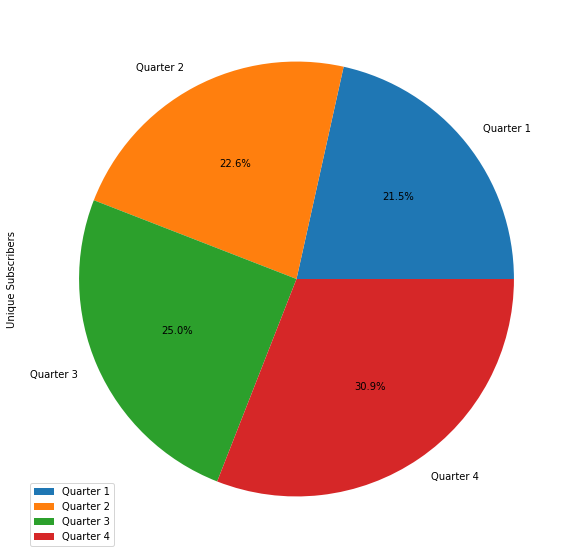

In [ ]:
pc = pd.DataFrame({'Unique Subscribers': [df_final_q1['subscription_id'].nunique(), df_final_q2['subscription_id'].nunique(), df_final_q3['subscription_id'].nunique(), df_final_q4['subscription_id'].nunique()]},
                  index=['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'])
plot = pc.plot.pie(y='Unique Subscribers', figsize=(10, 10), autopct='%1.1f%%')


In [ ]:
q1_customers = df_final_q1['subscription_id'].unique()
q2_customers = df_final_q2['subscription_id'].unique()
q3_customers = df_final_q3['subscription_id'].unique()
q4_customers = df_final_q4['subscription_id'].unique()

In [ ]:
q1_customer_events = df_final_q1['subscription_id'].value_counts()
q2_customer_events = df_final_q2['subscription_id'].value_counts()
q3_customer_events = df_final_q3['subscription_id'].value_counts()
q4_customer_events = df_final_q4['subscription_id'].value_counts()

In [ ]:
print("List of customers (subscription ID) with number of transactions in quarter 1\n", q1_customer_events)
print()

print("List of customers (subscription ID) with number of transactions in quarter 2\n", q2_customer_events)
print()

print("List of customers (subscription ID) with number of transactions in quarter 3\n", q3_customer_events)
print()

print("List of customers (subscription ID) with number of transactions in quarter 4\n", q4_customer_events)
print()

List of customers (subscription ID) with number of transactions in quarter 1
 45724.0    135
43545.0     98
48184.0     90
41659.0     81
41574.0     80
          ... 
42969.0      1
41427.0      1
42225.0      1
46150.0      1
49703.0      1
Name: subscription_id, Length: 2362, dtype: int64

List of customers (subscription ID) with number of transactions in quarter 2
 43544.0    118
49540.0    102
45724.0    101
49215.0     97
43370.0     88
          ... 
39429.0      1
49755.0      1
46185.0      1
41797.0      1
40936.0      1
Name: subscription_id, Length: 2478, dtype: int64

List of customers (subscription ID) with number of transactions in quarter 3
 43370.0    164
43722.0    115
45724.0    101
43544.0     99
40699.0     92
          ... 
43635.0      1
48394.0      1
48758.0      1
46035.0      1
52320.0      1
Name: subscription_id, Length: 2739, dtype: int64

List of customers (subscription ID) with number of transactions in quarter 4
 43722.0    194
43370.0    194
52788.0   

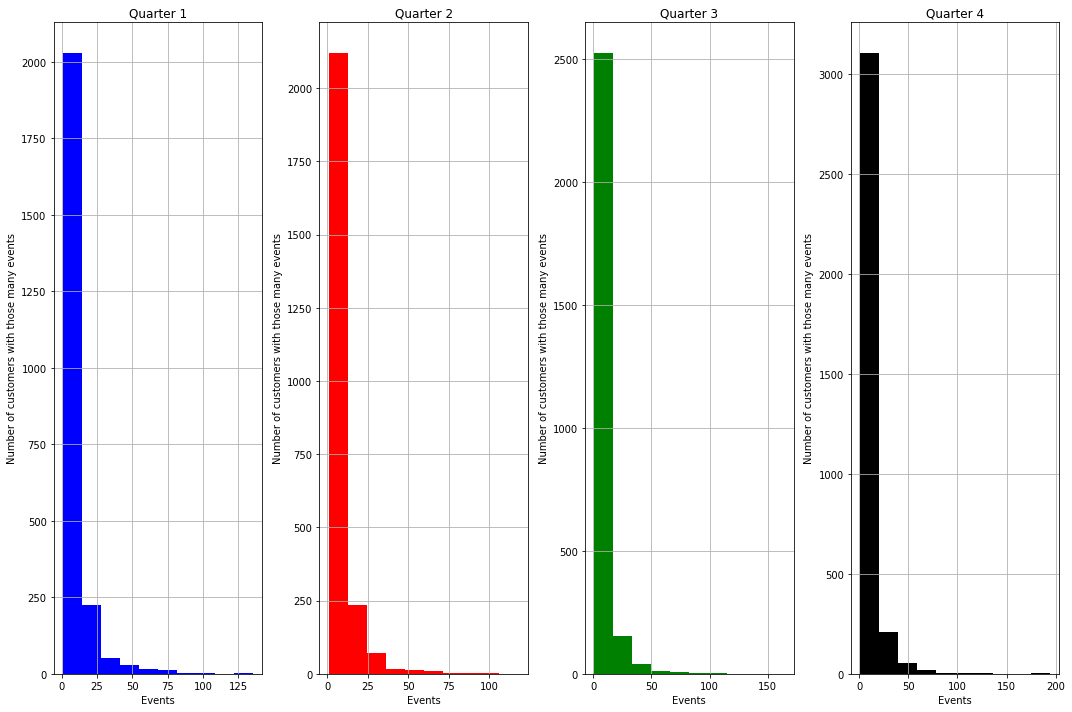

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 10))


h1 = q1_customer_events.hist(ax=axes[0], color = 'blue')
h1.set(xlabel = "Events")
h1.set(ylabel = "Number of customers with those many events")
h1.set(title = "Quarter 1")

h2 = q2_customer_events.hist(ax=axes[1], color = 'red')
h2.set(xlabel = "Events")
h2.set(ylabel = "Number of customers with those many events")
h2.set(title = "Quarter 2")

h3 = q3_customer_events.hist(ax=axes[2], color = 'green')
h3.set(xlabel = "Events")
h3.set(ylabel = "Number of customers with those many events")
h3.set(title = "Quarter 3")

h4 = q4_customer_events.hist(ax=axes[3], color = 'black')
h4.set(xlabel = "Events")
h4.set(ylabel = "Number of customers with those many events")
h4.set(title = "Quarter 4")

plt.tight_layout()
plt.show()

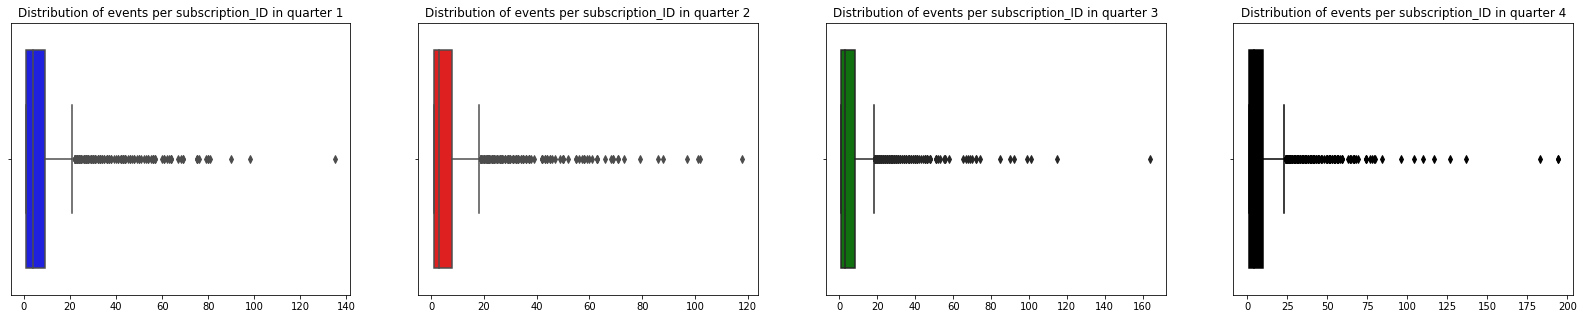

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(28, 5))
for i, ax in enumerate(axes.ravel()): 
    ax.set_title("Distribution of events per subscription_ID in quarter {}".format(i+1)) 


g1 = sns.boxplot(x=q1_customer_events, ax=axes[0], color = 'blue')
g1.set(xlabel = None)

g2 = sns.boxplot(x=q2_customer_events, ax=axes[1], color = 'red')
g2.set(xlabel = None)

g3 = sns.boxplot(x=q3_customer_events, ax=axes[2], color = 'green')
g3.set(xlabel = None)

g4 = sns.boxplot(x=q4_customer_events, ax=axes[3], color = 'black')
g4.set(xlabel = None)

plt.show()

1. Number of unique charging stations visited by each customer - quarterwise AND visualize

2. The choice set for each of these customer (WAIT)

3. The attractiveness of each charging station (associate a constant that indicates the level of extent a customer might visit it)

4. Compare with physical attributes of each hexagon

5. Choose a quarter with atleast 10 transactions. Identify the charging stations for the first 10 transactions

Additionally, check out properties of discrete choice models and how they are defined (from Kenneth Train's textbook)

In [ ]:
df_final_q1

,station_dsp_id,station_num_id,station_name,station_state,coordinate_x,coordinate_y,nb_chargepoints,charge_id,start_charge,stopped_charge,...,subscription_id,customer_id,offer_name,connector_type,billing_state,charge_amount,StartDateTime,StopDatetime,PiT_min,CostPerMin_in_pence
13991,KT3-6JF-01,63,Merton/West Barnes Lane,open,-0.239133,51.394518,2,139227,1/1/2018,1/1/2018,...,46931.0,453829.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,8.64,2018-01-01 00:10:57,2018-01-01 05:41:15,330.300000,2.615803815
74352,SW15-4PP-01,213,Wandsworth/Danebury Avenue,open,-0.252181,51.453233,3,139228,1/1/2018,1/1/2018,...,40889.0,269576.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,0.90,2018-01-01 08:20:06,2018-01-01 08:44:57,24.850000,3.621730382
31471,NW1-8UG-01,110,Camden/Regents Park Road,open,-0.157505,51.540027,2,139229,1/1/2018,1/1/2018,...,41899.0,387159.0,sourcelondon-full-apr-2017,Type 1 - 3 kW,BILLED,0.90,2018-01-01 08:45:04,2018-01-01 09:09:34,24.500000,3.673469387
102810,SW6-3UR-01,267,Hammersmith and Fulham/Ranelagh Gardens,open,-0.208541,51.467493,4,139230,1/1/2018,1/1/2018,...,46635.0,448448.0,sourcelondon-full-apr-2017,Type 2 - 7 kW,BILLED,3.16,2018-01-01 09:21:29,2018-01-01 10:48:59,87.500000,3.611428572
107984,SW7-5HF-01,273,Kensington and Chelsea/Queens Gate,open,-0.179282,51.497697,1,139231,1/1/2018,1/1/2018,...,47367.0,461300.0,sourcelondon-flexi-apr-2017,Type 2 - 7 kW,BILLED,17.52,2018-01-01 09:23:55,2018-01-01 14:20:10,296.250000,5.91392405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57794,SE1-9JT-01,172,Southwark/Holland Street,open,-0.101039,51.507347,1,159078,3/31/2018,3/31/2018,...,47521.0,407358.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,5.07,2018-03-31 20:05:28,2018-03-31 22:26:27,140.983333,3.59616976
131271,W1K-2HP-02,321,Westminster/Grosvenor Square,open,-0.151436,51.510791,3,159079,3/31/2018,3/31/2018,...,48989.0,484147.0,sourcelondon-flexi-jan-2018,Type 2 - 7 kW,BILLED,4.83,2018-03-31 20:12:51,2018-03-31 21:22:17,69.433333,6.95631301
86479,SW1X-7RN-01,248,Kensington and Chelsea/Seville Street,open,-0.159334,51.501828,1,159082,3/31/2018,4/1/2018,...,40627.0,383622.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,8.92,2018-03-31 21:40:23,2018-04-01 00:54:08,193.750000,4.603870968
131272,W1K-2HP-02,321,Westminster/Grosvenor Square,open,-0.151436,51.510791,3,159083,3/31/2018,4/1/2018,...,46289.0,440605.0,sourcelondon-full-jan-2018,Type 2 - 7 kW,BILLED,18.72,2018-03-31 22:00:27,2018-04-01 09:47:23,706.933333,2.648057337


In [ ]:
df_final_q1_unique_stations = pd.DataFrame({'subscription_id':df_final_q1.subscription_id.unique()})

df_final_q1_unique_stations['station_num_id'] = [list(set(df_final_q1['station_num_id'].loc[df_final_q1['subscription_id'] == x['subscription_id']])) 
    for _, x in df_final_q1_unique_stations.iterrows()]

In [ ]:
df_final_q1_unique_stations

,subscription_id,station_num_id
0,46931.0,[63]
1,40889.0,"[249, 195, 213, 167]"
2,41899.0,"[126, 110, 127]"
3,46635.0,"[322, 267, 204, 339, 221]"
4,47367.0,[273]
...,...,...
2357,43268.0,[323]
2358,44654.0,[352]
2359,47934.0,[119]
2360,49694.0,[89]


In [ ]:
df_final_q1_unique_stations["number of unique stations"] = np.nan
df_final_q1_unique_stations

,subscription_id,station_num_id,number of unique stations
0,46931.0,[63],NaN
1,40889.0,"[249, 195, 213, 167]",NaN
2,41899.0,"[126, 110, 127]",NaN
3,46635.0,"[322, 267, 204, 339, 221]",NaN
4,47367.0,[273],NaN
...,...,...,...
2357,43268.0,[323],NaN
2358,44654.0,[352],NaN
2359,47934.0,[119],NaN
2360,49694.0,[89],NaN


In [ ]:
for i in range(0, len(df_final_q1_unique_stations)):
  df_final_q1_unique_stations["number of unique stations"][i] = len((df_final_q1_unique_stations['station_num_id'][i]))

<ipython-input-32-d6ede0697b35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_q1_unique_stations["number of unique stations"][i] = len((df_final_q1_unique_stations['station_num_id'][i]))


In [ ]:
df_final_q1_unique_stations.head(10)

,subscription_id,station_num_id,number of unique stations
0,46931.0,[63],1.0
1,40889.0,"[249, 195, 213, 167]",4.0
2,41899.0,"[126, 110, 127]",3.0
3,46635.0,"[322, 267, 204, 339, 221]",5.0
4,47367.0,[273],1.0
5,48221.0,[267],1.0
6,38663.0,"[323, 123, 110, 295]",4.0
7,42256.0,"[322, 325, 262]",3.0
8,47748.0,"[266, 260, 269]",3.0
9,43759.0,[298],1.0


<AxesSubplot:title={'center':'Quarter 1'}, xlabel='Number of unique stations visited', ylabel='Count'>

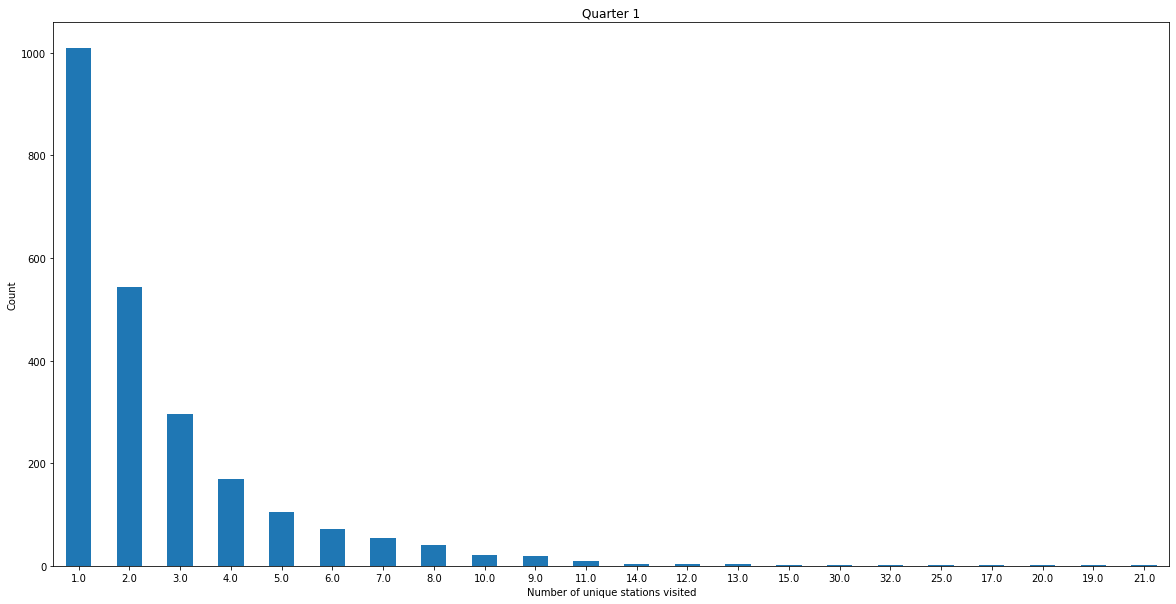

In [ ]:
df_final_q1_unique_stations['number of unique stations'].value_counts().plot(kind='bar', xlabel='Number of unique stations visited', ylabel='Count', title = 'Quarter 1',rot=0, figsize = (20, 10))

In [ ]:
df_final_q2_unique_stations = pd.DataFrame({'subscription_id':df_final_q2.subscription_id.unique()})

df_final_q2_unique_stations['station_num_id'] = [list(set(df_final_q2['station_num_id'].loc[df_final_q2['subscription_id'] == x['subscription_id']])) 
    for _, x in df_final_q2_unique_stations.iterrows()]

df_final_q3_unique_stations = pd.DataFrame({'subscription_id':df_final_q3.subscription_id.unique()})

df_final_q3_unique_stations['station_num_id'] = [list(set(df_final_q3['station_num_id'].loc[df_final_q3['subscription_id'] == x['subscription_id']])) 
    for _, x in df_final_q3_unique_stations.iterrows()]

df_final_q4_unique_stations = pd.DataFrame({'subscription_id':df_final_q4.subscription_id.unique()})

df_final_q4_unique_stations['station_num_id'] = [list(set(df_final_q4['station_num_id'].loc[df_final_q4['subscription_id'] == x['subscription_id']])) 
    for _, x in df_final_q4_unique_stations.iterrows()]

In [ ]:
df_final_q2_unique_stations["number of unique stations"] = np.nan
df_final_q3_unique_stations["number of unique stations"] = np.nan
df_final_q4_unique_stations["number of unique stations"] = np.nan

In [ ]:
for i in range(0, len(df_final_q2_unique_stations)):
  df_final_q2_unique_stations["number of unique stations"][i] = len((df_final_q2_unique_stations['station_num_id'][i]))

for i in range(0, len(df_final_q3_unique_stations)):
  df_final_q3_unique_stations["number of unique stations"][i] = len((df_final_q3_unique_stations['station_num_id'][i]))

for i in range(0, len(df_final_q4_unique_stations)):
  df_final_q4_unique_stations["number of unique stations"][i] = len((df_final_q4_unique_stations['station_num_id'][i]))

<ipython-input-37-50b443e6c3e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_q2_unique_stations["number of unique stations"][i] = len((df_final_q2_unique_stations['station_num_id'][i]))
<ipython-input-37-50b443e6c3e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_q3_unique_stations["number of unique stations"][i] = len((df_final_q3_unique_stations['station_num_id'][i]))
<ipython-input-37-50b443e6c3e8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

<AxesSubplot:title={'center':'Quarter 2'}, xlabel='Number of unique stations visited', ylabel='Count'>

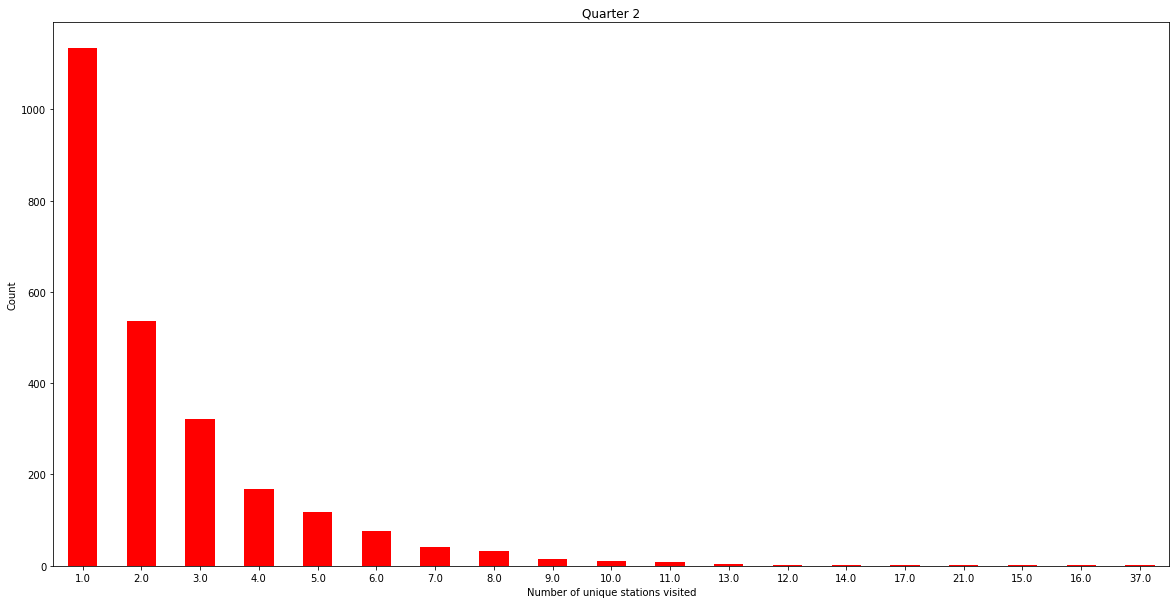

In [ ]:
df_final_q2_unique_stations['number of unique stations'].value_counts().plot(kind='bar', xlabel='Number of unique stations visited', ylabel='Count', title = 'Quarter 2',rot=0, figsize = (20, 10), color='red')

<AxesSubplot:title={'center':'Quarter 3'}, xlabel='Number of unique stations visited', ylabel='Count'>

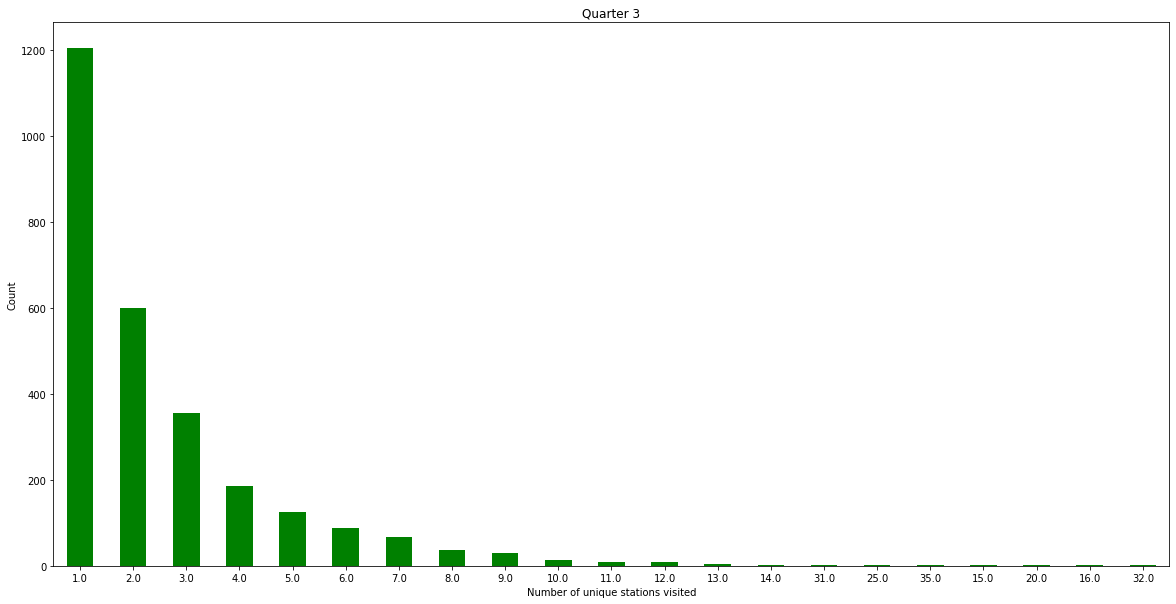

In [ ]:
df_final_q3_unique_stations['number of unique stations'].value_counts().plot(kind='bar', xlabel='Number of unique stations visited', ylabel='Count', title = 'Quarter 3',rot=0, figsize = (20, 10), color='green')

<AxesSubplot:title={'center':'Quarter 4'}, xlabel='Number of unique stations visited', ylabel='Count'>

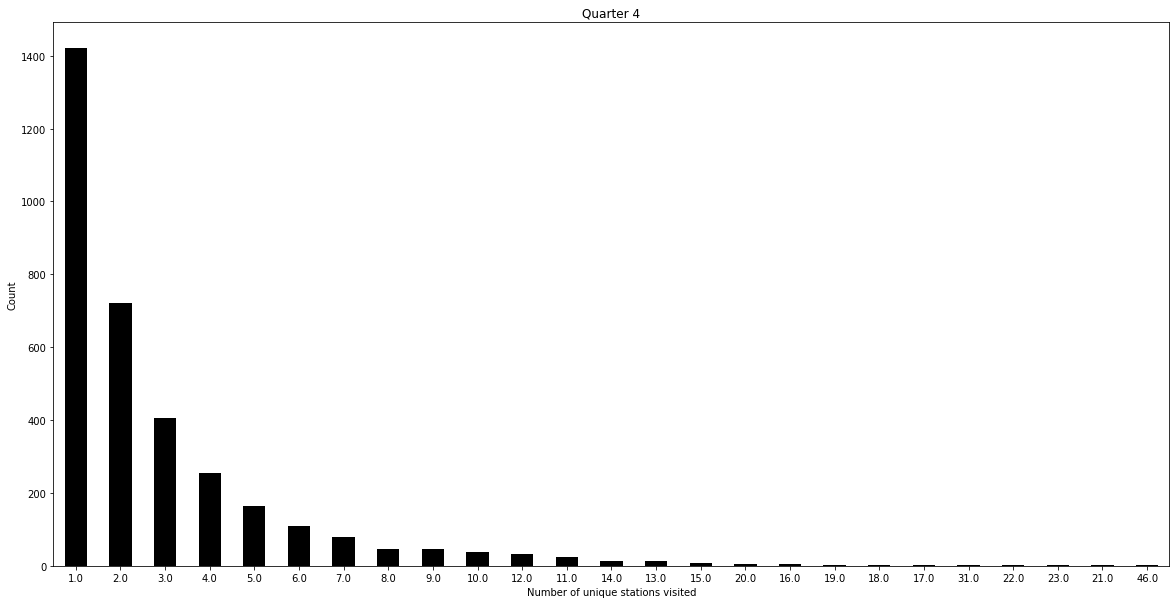

In [ ]:
df_final_q4_unique_stations['number of unique stations'].value_counts().plot(kind='bar', xlabel='Number of unique stations visited', ylabel='Count', title = 'Quarter 4',rot=0, figsize = (20, 10), color='black')

In [ ]:
df_final_q2_unique_stations

,subscription_id,station_num_id,number of unique stations
0,48707.0,"[263, 20, 279, 285, 348, 29]",6.0
1,49527.0,[247],1.0
2,43244.0,"[321, 164, 165]",3.0
3,47959.0,"[200, 320, 195, 172]",4.0
4,40775.0,"[232, 193, 195, 171]",4.0
...,...,...,...
2473,44478.0,[268],1.0
2474,51121.0,[320],1.0
2475,46488.0,[172],1.0
2476,49205.0,[193],1.0


In [ ]:
df_final_q3_unique_stations

,subscription_id,station_num_id,number of unique stations
0,38704.0,[347],1.0
1,48398.0,"[320, 203, 199]",3.0
2,49827.0,[117],1.0
3,51052.0,[147],1.0
4,43244.0,"[200, 321, 164, 165]",4.0
...,...,...,...
2734,52628.0,[223],1.0
2735,49863.0,[117],1.0
2736,52574.0,[340],1.0
2737,52589.0,[228],1.0


In [ ]:
df_final_q4_unique_stations.head(10)

,subscription_id,station_num_id,number of unique stations
0,50716.0,"[96, 193, 323, 260, 295, 300, 269, 333, 45, 30...",15.0
1,49626.0,[144],1.0
2,45644.0,"[297, 249, 351]",3.0
3,51927.0,[325],1.0
4,41210.0,"[360, 164, 325, 324]",4.0
5,51253.0,"[323, 357, 325, 170, 157]",5.0
6,52611.0,"[260, 295, 296, 298, 204, 335, 273, 309, 246, 63]",10.0
7,50388.0,[308],1.0
8,39837.0,"[177, 174]",2.0
9,46503.0,"[246, 159]",2.0


In [ ]:
df_final_q1.to_csv("Quarter 1 filtered data.csv")

In [ ]:
df_final_q2.to_csv("Quarter 2 filtered data.csv")
df_final_q3.to_csv("Quarter 3 filtered data.csv")
df_final_q4.to_csv("Quarter 4 filtered data.csv")